In [80]:
#Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurar o matplotlib para gráficos mais bonitos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [81]:
df = pd.read_csv('dados_streaming_musica.csv')
print(f"Total de usuários: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")
print()

# Ver como são os dados
print("PRIMEIROS DADOS:")
print(df.head())

Total de usuários: 100
Total de colunas: 15

PRIMEIROS DADOS:
   id_usuario  idade genero     plano  tempo_uso_diario_min  \
0           1     23      F   Premium                   180   
1           2     34      M  Gratuito                    90   
2           3     19      F   Premium                   240   
3           4     28      M  Familiar                   150   
4           5     45      F  Gratuito                    60   

   musicas_ouvidas_dia genero_favorito dispositivo        regiao  \
0                   45             Pop  Smartphone       Sudeste   
1                   22            Rock     Desktop           Sul   
2                   60             Pop  Smartphone      Nordeste   
3                   38         Hip Hop      Tablet       Sudeste   
4                   15             MPB     Desktop  Centro-Oeste   

   gasto_mensal  avaliacao_app  tempo_cadastro_meses  pula_musicas_dia  \
0          19.9            4.5                    12                 8   
1 

In [82]:
print("COLUNAS DO DATASET:")
print(df.columns.tolist())
print()

print("TIPOS DE DADOS:")
print(df.dtypes)
print()

print("INFORMAÇÕES GERAIS:")
df.info()

COLUNAS DO DATASET:
['id_usuario', 'idade', 'genero', 'plano', 'tempo_uso_diario_min', 'musicas_ouvidas_dia', 'genero_favorito', 'dispositivo', 'regiao', 'gasto_mensal', 'avaliacao_app', 'tempo_cadastro_meses', 'pula_musicas_dia', 'usa_offline', 'compartilha_playlists']

TIPOS DE DADOS:
id_usuario                 int64
idade                      int64
genero                    object
plano                     object
tempo_uso_diario_min       int64
musicas_ouvidas_dia        int64
genero_favorito           object
dispositivo               object
regiao                    object
gasto_mensal             float64
avaliacao_app            float64
tempo_cadastro_meses       int64
pula_musicas_dia           int64
usa_offline               object
compartilha_playlists     object
dtype: object

INFORMAÇÕES GERAIS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------               

In [83]:
print("VERIFICAÇÃO DE VALORES NULOS:")
print(df.isnull().sum())
print()

print("ESTATÍSTICAS BÁSICAS:")
print(df.describe())

VERIFICAÇÃO DE VALORES NULOS:
id_usuario               0
idade                    0
genero                   0
plano                    0
tempo_uso_diario_min     0
musicas_ouvidas_dia      0
genero_favorito          0
dispositivo              0
regiao                   0
gasto_mensal             0
avaliacao_app            0
tempo_cadastro_meses     0
pula_musicas_dia         0
usa_offline              0
compartilha_playlists    0
dtype: int64

ESTATÍSTICAS BÁSICAS:
       id_usuario       idade  tempo_uso_diario_min  musicas_ouvidas_dia  \
count  100.000000  100.000000            100.000000           100.000000   
mean    50.500000   31.230000            154.700000            38.590000   
std     29.011492    8.138765             59.453827            14.918022   
min      1.000000   18.000000             50.000000            12.000000   
25%     25.750000   24.750000            103.750000            25.750000   
50%     50.500000   30.500000            157.500000            39.500000 

In [84]:
print("ANÁLISE DE IDADE")
print("-" * 30)

# Calcular estatísticas básicas
idade_media = df['idade'].mean()
idade_mediana = df['idade'].median()
idade_moda = df['idade'].mode().iloc[0] if len(df['idade'].mode()) > 0 else None
idade_desvio = df['idade'].std()
idade_min = df['idade'].min()
idade_max = df['idade'].max()

print(f"Média: {idade_media:.1f} anos")
print(f"Mediana: {idade_mediana:.1f} anos")
if idade_moda is not None:
    print(f"Moda: {idade_moda:.0f} anos")
print(f"Desvio Padrão: {idade_desvio:.1f} anos")
print(f"Idade Mínima: {idade_min} anos")
print(f"Idade Máxima: {idade_max} anos")

ANÁLISE DE IDADE
------------------------------
Média: 31.2 anos
Mediana: 30.5 anos
Moda: 26 anos
Desvio Padrão: 8.1 anos
Idade Mínima: 18 anos
Idade Máxima: 48 anos


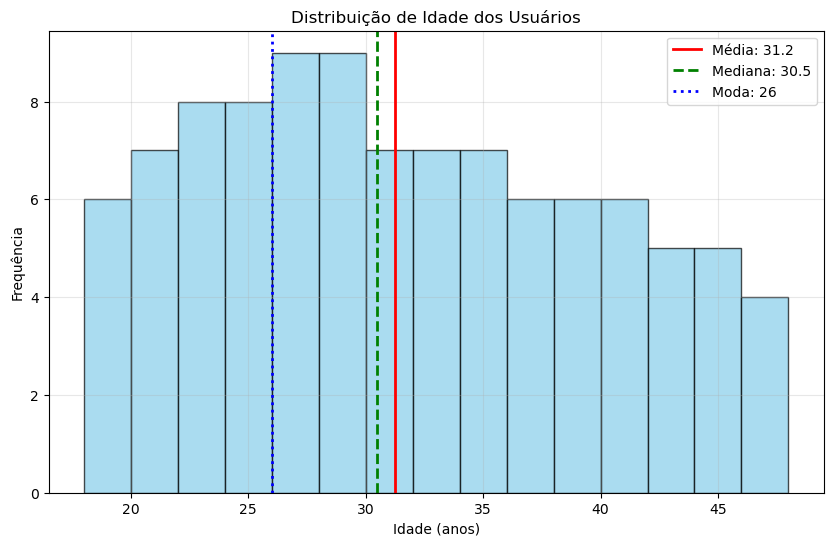

In [85]:
# Criar histograma de idade
plt.figure(figsize=(10, 6))
plt.hist(df['idade'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')

# Adicionar linhas das estatísticas
plt.axvline(idade_media, color='red', linestyle='-', linewidth=2, label=f'Média: {idade_media:.1f}')
plt.axvline(idade_mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {idade_mediana:.1f}')
if idade_moda is not None:
    plt.axvline(idade_moda, color='blue', linestyle=':', linewidth=2, label=f'Moda: {idade_moda:.0f}')

plt.title('Distribuição de Idade dos Usuários')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [86]:
print("ANÁLISE DE GÊNERO")
print("-" * 30)

# Contar usuários por gênero
genero_counts = df['genero'].value_counts()
genero_percentual = df['genero'].value_counts(normalize=True) * 100

print("Distribuição por gênero:")
for genero in genero_counts.index:
    count = genero_counts[genero]
    percent = genero_percentual[genero]
    print(f"{genero}: {count} usuários ({percent:.1f}%)")

ANÁLISE DE GÊNERO
------------------------------
Distribuição por gênero:
F: 50 usuários (50.0%)
M: 50 usuários (50.0%)


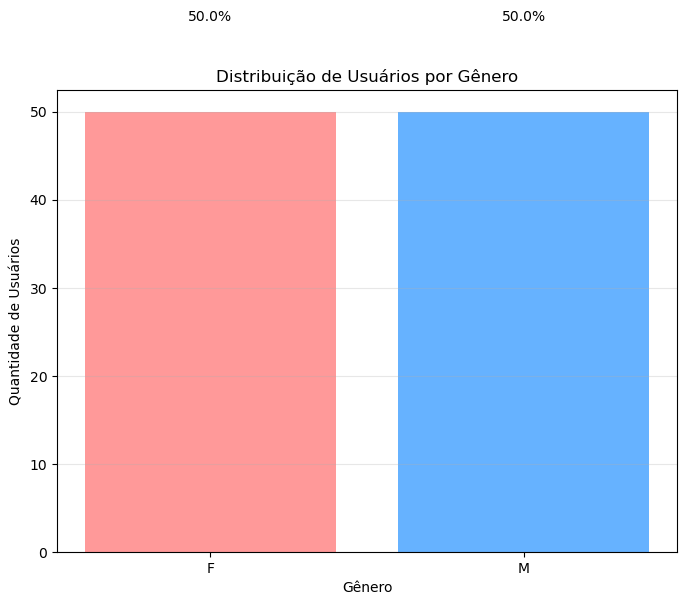

In [87]:
# Criar gráfico de barras
plt.figure(figsize=(8, 6))
cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
bars = plt.bar(genero_counts.index, genero_counts.values, color=cores[:len(genero_counts)])

plt.title('Distribuição de Usuários por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Usuários')

# Adicionar percentuais nas barras
for bar, genero in zip(bars, genero_counts.index):
    percent = genero_percentual[genero]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{percent:.1f}%', ha='center', va='bottom')

plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [88]:
print("ANÁLISE DE REGIÃO")
print("-" * 30)

# Contar usuários por região
regiao_counts = df['regiao'].value_counts()
regiao_percentual = df['regiao'].value_counts(normalize=True) * 100

print("Distribuição por região:")
for regiao in regiao_counts.index:
    count = regiao_counts[regiao]
    percent = regiao_percentual[regiao]
    print(f"{regiao}: {count} usuários ({percent:.1f}%)")

ANÁLISE DE REGIÃO
------------------------------
Distribuição por região:
Sudeste: 22 usuários (22.0%)
Sul: 21 usuários (21.0%)
Nordeste: 20 usuários (20.0%)
Centro-Oeste: 19 usuários (19.0%)
Norte: 18 usuários (18.0%)


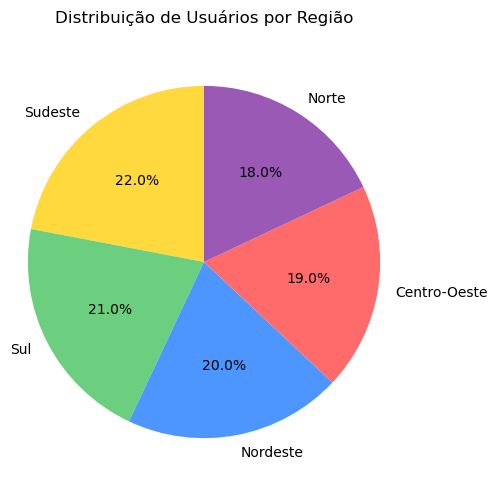

In [89]:
# Criar gráfico de pizza
plt.figure(figsize=(5, 6))
cores = ['#FFD93D', '#6BCF7F', '#4D96FF', '#FF6B6B', '#9B59B6']
plt.pie(regiao_counts.values, labels=regiao_counts.index, autopct='%1.1f%%',
        colors=cores[:len(regiao_counts)], startangle=90)
plt.title('Distribuição de Usuários por Região')
plt.axis('equal')
plt.show()

In [90]:
# Etapa 2
print("TEMPO DE USO DIÁRIO")
print("-" * 30)

# Calcular estatísticas
tempo_media = df['tempo_uso_diario_min'].mean()
tempo_mediana = df['tempo_uso_diario_min'].median()
tempo_moda = df['tempo_uso_diario_min'].mode().iloc[0] if len(df['tempo_uso_diario_min'].mode()) > 0 else None
tempo_desvio = df['tempo_uso_diario_min'].std()

print(f"Média: {tempo_media:.1f} minutos")
print(f"Mediana: {tempo_mediana:.1f} minutos")
if tempo_moda is not None:
    print(f"Moda: {tempo_moda:.1f} minutos")
print(f"Desvio Padrão: {tempo_desvio:.1f} minutos")


TEMPO DE USO DIÁRIO
------------------------------
Média: 154.7 minutos
Mediana: 157.5 minutos
Moda: 180.0 minutos
Desvio Padrão: 59.5 minutos


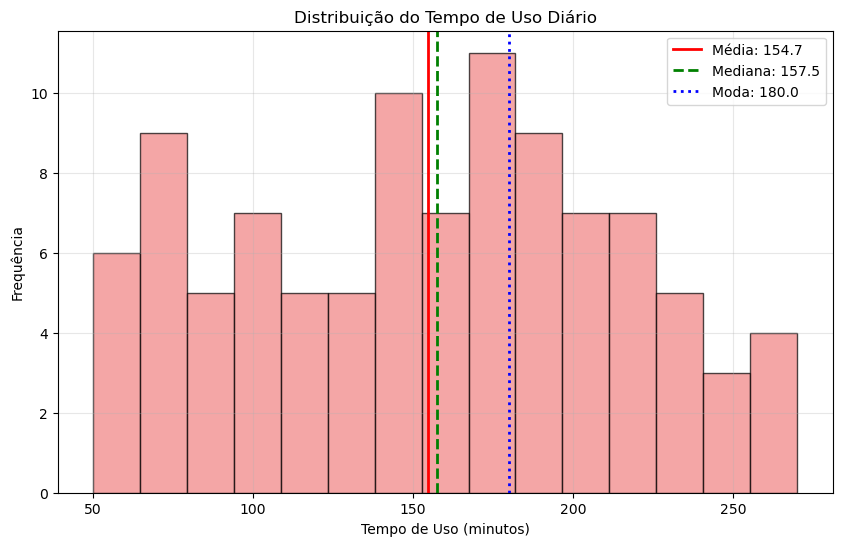

In [91]:
# Criar histograma
plt.figure(figsize=(10, 6))
plt.hist(df['tempo_uso_diario_min'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')

plt.axvline(tempo_media, color='red', linestyle='-', linewidth=2, label=f'Média: {tempo_media:.1f}')
plt.axvline(tempo_mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {tempo_mediana:.1f}')
if tempo_moda is not None:
    plt.axvline(tempo_moda, color='blue', linestyle=':', linewidth=2, label=f'Moda: {tempo_moda:.1f}')

plt.title('Distribuição do Tempo de Uso Diário')
plt.xlabel('Tempo de Uso (minutos)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [92]:
print("MÚSICAS OUVIDAS POR DIA")
print("-" * 30)

# Calcular estatísticas
musicas_media = df['musicas_ouvidas_dia'].mean()
musicas_mediana = df['musicas_ouvidas_dia'].median()
musicas_moda = df['musicas_ouvidas_dia'].mode().iloc[0] if len(df['musicas_ouvidas_dia'].mode()) > 0 else None
musicas_desvio = df['musicas_ouvidas_dia'].std()

print(f"Média: {musicas_media:.1f} músicas")
print(f"Mediana: {musicas_mediana:.1f} músicas")
if musicas_moda is not None:
    print(f"Moda: {musicas_moda:.0f} músicas")
print(f"Desvio Padrão: {musicas_desvio:.1f} músicas")

MÚSICAS OUVIDAS POR DIA
------------------------------
Média: 38.6 músicas
Mediana: 39.5 músicas
Moda: 45 músicas
Desvio Padrão: 14.9 músicas


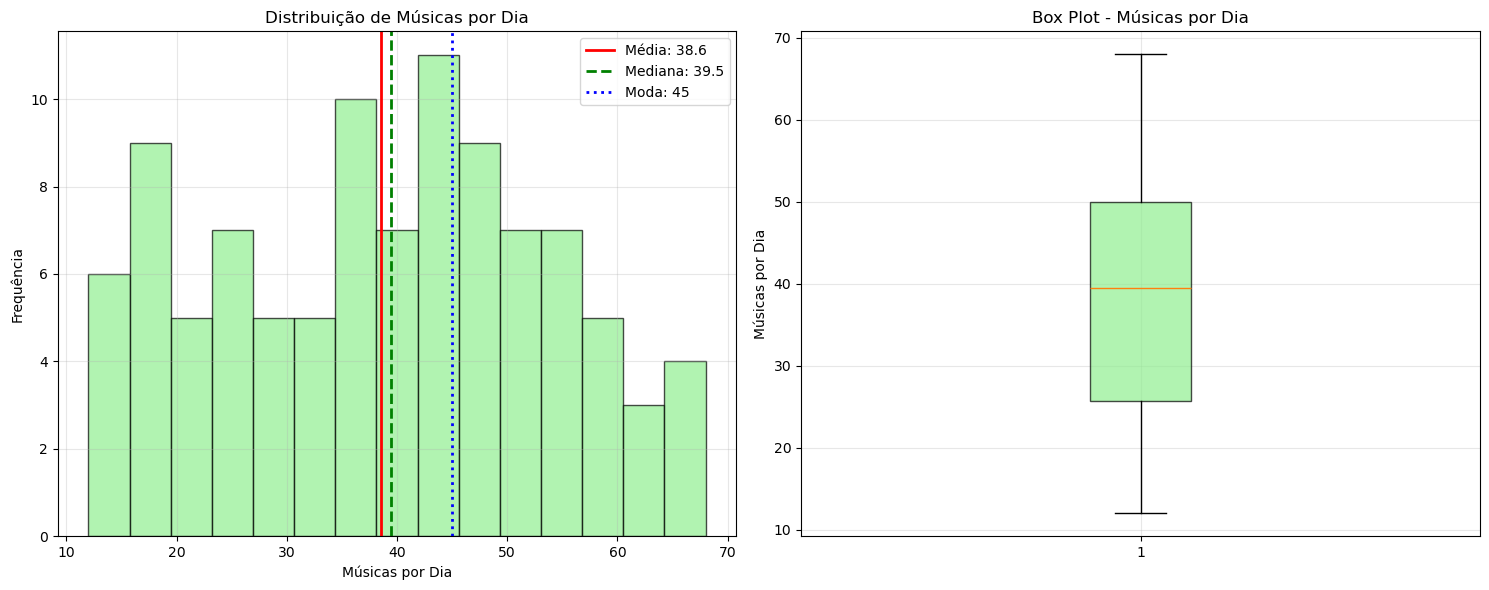

In [93]:
# Criar histograma e boxplot lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma
ax1.hist(df['musicas_ouvidas_dia'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
ax1.axvline(musicas_media, color='red', linestyle='-', linewidth=2, label=f'Média: {musicas_media:.1f}')
ax1.axvline(musicas_mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {musicas_mediana:.1f}')
if musicas_moda is not None:
    ax1.axvline(musicas_moda, color='blue', linestyle=':', linewidth=2, label=f'Moda: {musicas_moda:.0f}')

ax1.set_title('Distribuição de Músicas por Dia')
ax1.set_xlabel('Músicas por Dia')
ax1.set_ylabel('Frequência')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box Plot
ax2.boxplot(df['musicas_ouvidas_dia'], patch_artist=True,
           boxprops=dict(facecolor='lightgreen', alpha=0.7))
ax2.set_title('Box Plot - Músicas por Dia')
ax2.set_ylabel('Músicas por Dia')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [94]:
print("GÊNERO MUSICAL FAVORITO")
print("-" * 30)

# Contar gêneros musicais
genero_musical_counts = df['genero_favorito'].value_counts()

print("Gêneros mais populares:")
for i, (genero, count) in enumerate(genero_musical_counts.head().items(), 1):
    print(f"{i}. {genero}: {count} usuários")

GÊNERO MUSICAL FAVORITO
------------------------------
Gêneros mais populares:
1. Pop: 18 usuários
2. Rock: 17 usuários
3. MPB: 17 usuários
4. Hip Hop: 16 usuários
5. Eletrônica: 16 usuários


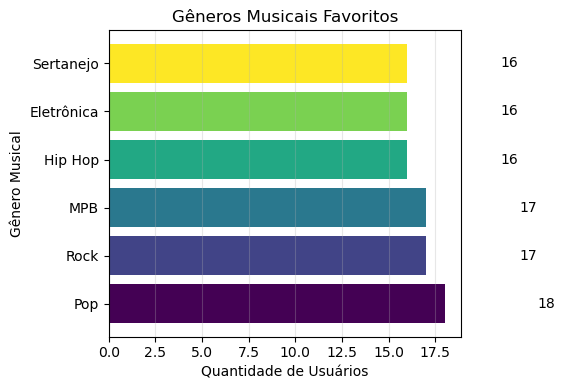

In [95]:
# Criar gráfico de barras horizontal
plt.figure(figsize=(6, 4))
plt.barh(genero_musical_counts.index, genero_musical_counts.values,
         color=plt.cm.viridis(np.linspace(0, 1, len(genero_musical_counts))))

plt.title('Gêneros Musicais Favoritos')
plt.xlabel('Quantidade de Usuários')
plt.ylabel('Gênero Musical')

# Adicionar valores nas barras
for i, (genero, count) in enumerate(genero_musical_counts.items()):
    plt.text(count + 5, i, f'{count}', va='center')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [96]:
print("AVALIAÇÃO DO APP")
print("-" * 30)

# Calcular estatísticas
aval_media = df['avaliacao_app'].mean()
aval_mediana = df['avaliacao_app'].median()
aval_moda = df['avaliacao_app'].mode().iloc[0] if len(df['avaliacao_app'].mode()) > 0 else None

# Calcular satisfação (4.0 ou superior)
satisfacao = (df['avaliacao_app'] >= 4.0).sum()
percentual_satisfacao = (satisfacao / len(df)) * 100

print(f"Média: {aval_media:.2f}")
print(f"Mediana: {aval_mediana:.2f}")
if aval_moda is not None:
    print(f"Moda: {aval_moda:.1f}")
print(f"Usuários satisfeitos (≥4.0): {satisfacao} ({percentual_satisfacao:.1f}%)")

AVALIAÇÃO DO APP
------------------------------
Média: 4.15
Mediana: 4.20
Moda: 4.1
Usuários satisfeitos (≥4.0): 72 (72.0%)


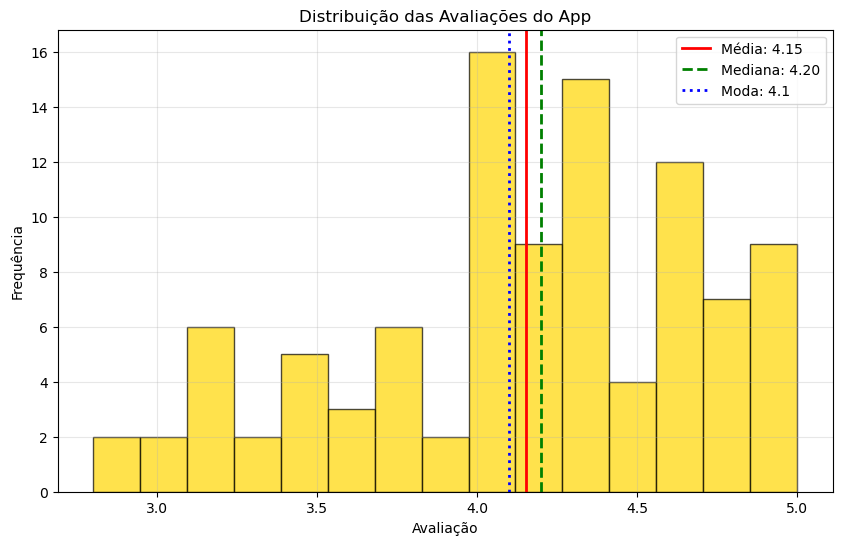

In [97]:
# Criar histograma
plt.figure(figsize=(10, 6))
plt.hist(df['avaliacao_app'], bins=15, alpha=0.7, color='gold', edgecolor='black')

plt.axvline(aval_media, color='red', linestyle='-', linewidth=2, label=f'Média: {aval_media:.2f}')
plt.axvline(aval_mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {aval_mediana:.2f}')
if aval_moda is not None:
    plt.axvline(aval_moda, color='blue', linestyle=':', linewidth=2, label=f'Moda: {aval_moda:.1f}')

plt.title('Distribuição das Avaliações do App')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

TEMPO DE USO vs MÚSICAS OUVIDAS
------------------------------


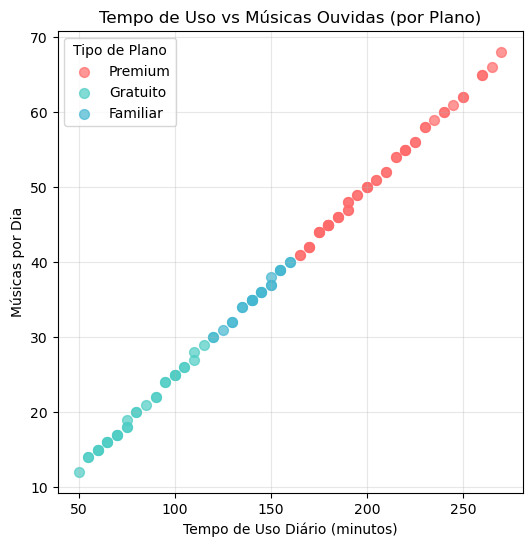

Correlação: 1.000
→ Correlação positiva forte: mais tempo = mais músicas


In [98]:
print("TEMPO DE USO vs MÚSICAS OUVIDAS")
print("-" * 30)

# Criar gráfico de dispersão por plano
plt.figure(figsize=(6, 6))

# Cores para cada plano
cores_plano = {'Premium': '#FF6B6B', 'Gratuito': '#4ECDC4', 'Familiar': '#45B7D1'}

# Plotar cada plano com cor diferente
for plano in df['plano'].unique():
    dados_plano = df[df['plano'] == plano]
    plt.scatter(dados_plano['tempo_uso_diario_min'], dados_plano['musicas_ouvidas_dia'],
               c=cores_plano.get(plano, 'gray'), label=plano, alpha=0.7, s=50)

plt.title('Tempo de Uso vs Músicas Ouvidas (por Plano)')
plt.xlabel('Tempo de Uso Diário (minutos)')
plt.ylabel('Músicas por Dia')
plt.legend(title='Tipo de Plano')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular correlação
correlacao = df['tempo_uso_diario_min'].corr(df['musicas_ouvidas_dia'])
print(f"Correlação: {correlacao:.3f}")
if correlacao > 0.5:
    print("→ Correlação positiva forte: mais tempo = mais músicas")
elif correlacao > 0.3:
    print("→ Correlação positiva moderada")
else:
    print("→ Correlação fraca")

In [99]:
print("ANÁLISE POR PLANO")
print("-" * 30)

# Comparar tempo de uso por plano
tempo_por_plano = df.groupby('plano')['tempo_uso_diario_min'].mean()
print("Tempo de uso médio por plano:")
for plano, tempo in tempo_por_plano.items():
    print(f"{plano}: {tempo:.1f} minutos")

# Se existir coluna de músicas puladas
if 'pula_musicas_dia' in df.columns:
    puladas_por_plano = df.groupby('plano')['pula_musicas_dia'].mean()
    print("\nMúsicas puladas por dia (média):")
    for plano, puladas in puladas_por_plano.items():
        print(f"{plano}: {puladas:.1f} músicas")

ANÁLISE POR PLANO
------------------------------
Tempo de uso médio por plano:
Familiar: 143.1 minutos
Gratuito: 82.3 minutos
Premium: 206.6 minutos

Músicas puladas por dia (média):
Familiar: 10.8 músicas
Gratuito: 22.4 músicas
Premium: 6.1 músicas


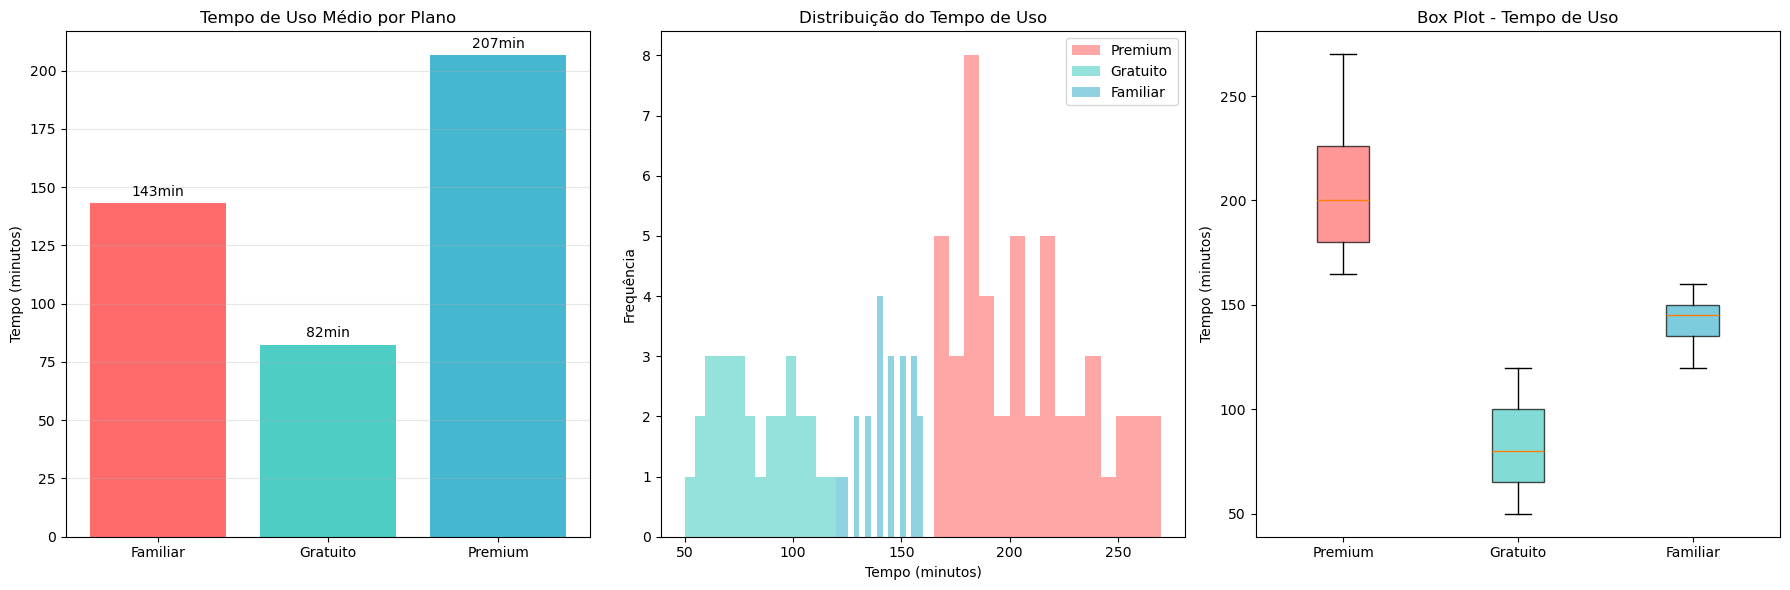

In [105]:
# Criar gráficos comparativos
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Barras comparativas
cores_plano_list = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax1.bar(tempo_por_plano.index, tempo_por_plano.values, color=cores_plano_list)
ax1.set_title('Tempo de Uso Médio por Plano')
ax1.set_ylabel('Tempo (minutos)')
ax1.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, tempo in zip(bars, tempo_por_plano.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{tempo:.0f}min', ha='center', va='bottom')

# Gráfico 2: Histogramas sobrepostos
for i, plano in enumerate(df['plano'].unique()):
    dados_plano = df[df['plano'] == plano]['tempo_uso_diario_min']
    ax2.hist(dados_plano, alpha=0.6, label=plano, bins=15, color=cores_plano_list[i])
ax2.set_title('Distribuição do Tempo de Uso')
ax2.set_xlabel('Tempo (minutos)')
ax2.set_ylabel('Frequência')
ax2.legend()

# Gráfico 3: Box plots
dados_box = [df[df['plano'] == plano]['tempo_uso_diario_min'] for plano in df['plano'].unique()]
bp = ax3.boxplot(dados_box, tick_labels=df['plano'].unique(), patch_artist=True)
for patch, cor in zip(bp['boxes'], cores_plano_list):
    patch.set_facecolor(cor)
    patch.set_alpha(0.7)
ax3.set_title('Box Plot - Tempo de Uso')
ax3.set_ylabel('Tempo (minutos)')

plt.tight_layout()
plt.show()

In [101]:
print("ANÁLISE POR DISPOSITIVO")
print("-" * 30)

# Tempo de uso por dispositivo
tempo_dispositivo = df.groupby('dispositivo')['tempo_uso_diario_min'].mean()
avaliacao_dispositivo = df.groupby('dispositivo')['avaliacao_app'].mean()

print("Tempo de uso médio por dispositivo:")
for dispositivo, tempo in tempo_dispositivo.items():
    print(f"{dispositivo}: {tempo:.1f} minutos")

print("\nAvaliação média por dispositivo:")
for dispositivo, avaliacao in avaliacao_dispositivo.items():
    print(f"{dispositivo}: {avaliacao:.2f} estrelas")

ANÁLISE POR DISPOSITIVO
------------------------------
Tempo de uso médio por dispositivo:
Desktop: 106.8 minutos
Smart TV: 162.8 minutos
Smartphone: 191.0 minutos
Tablet: 157.6 minutos

Avaliação média por dispositivo:
Desktop: 3.65 estrelas
Smart TV: 4.24 estrelas
Smartphone: 4.51 estrelas
Tablet: 4.24 estrelas


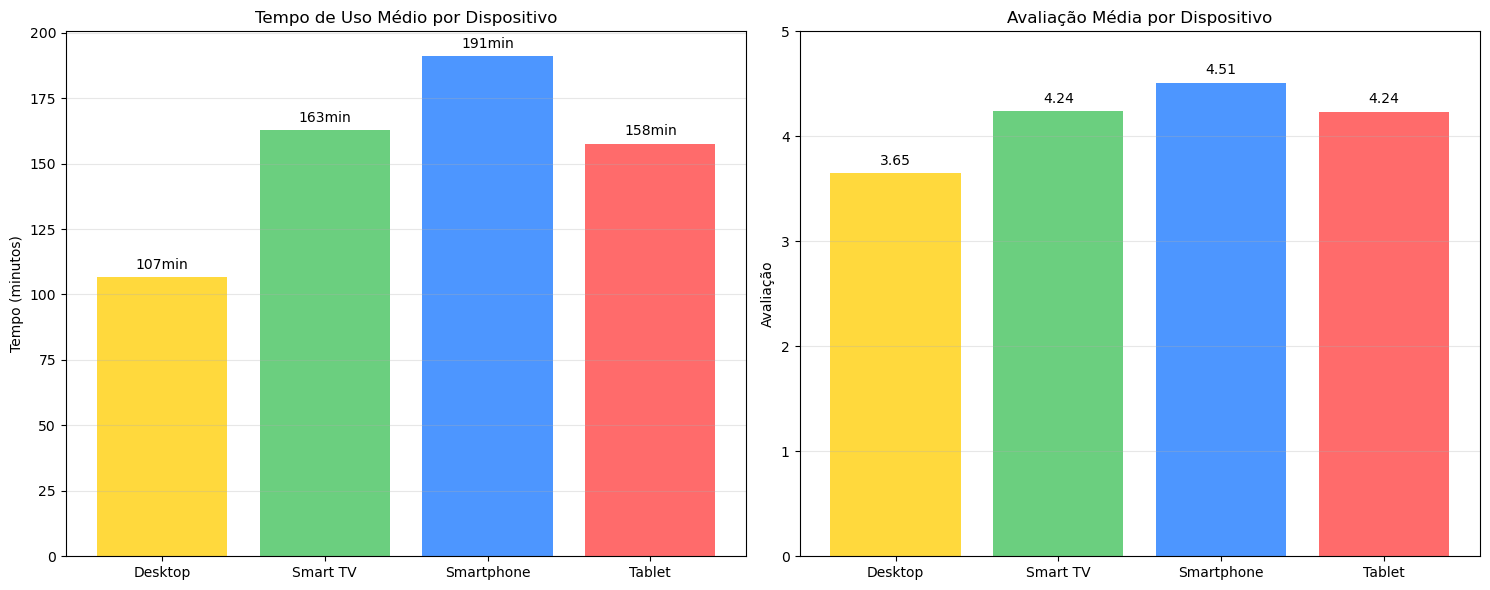

In [102]:
# Criar gráficos comparativos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Tempo de uso
cores_dispositivo = ['#FFD93D', '#6BCF7F', '#4D96FF', '#FF6B6B']
bars1 = ax1.bar(tempo_dispositivo.index, tempo_dispositivo.values,
                color=cores_dispositivo[:len(tempo_dispositivo)])
ax1.set_title('Tempo de Uso Médio por Dispositivo')
ax1.set_ylabel('Tempo (minutos)')
ax1.grid(True, alpha=0.3, axis='y')

for bar, tempo in zip(bars1, tempo_dispositivo.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{tempo:.0f}min', ha='center', va='bottom')

# Gráfico 2: Avaliação
bars2 = ax2.bar(avaliacao_dispositivo.index, avaliacao_dispositivo.values,
                color=cores_dispositivo[:len(avaliacao_dispositivo)])
ax2.set_title('Avaliação Média por Dispositivo')
ax2.set_ylabel('Avaliação')
ax2.set_ylim(0, 5)
ax2.grid(True, alpha=0.3, axis='y')

for bar, avaliacao in zip(bars2, avaliacao_dispositivo.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{avaliacao:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [103]:
print("IDADE MÉDIA POR GÊNERO MUSICAL")
print("-" * 30)

# Idade média por gênero musical
idade_genero_musical = df.groupby('genero_favorito')['idade'].mean().sort_values(ascending=False)

print("Idade média por gênero musical:")
for genero, idade in idade_genero_musical.items():
    print(f"{genero}: {idade:.1f} anos")


IDADE MÉDIA POR GÊNERO MUSICAL
------------------------------
Idade média por gênero musical:
Rock: 38.2 anos
MPB: 36.5 anos
Eletrônica: 33.2 anos
Sertanejo: 30.3 anos
Hip Hop: 26.2 anos
Pop: 23.2 anos


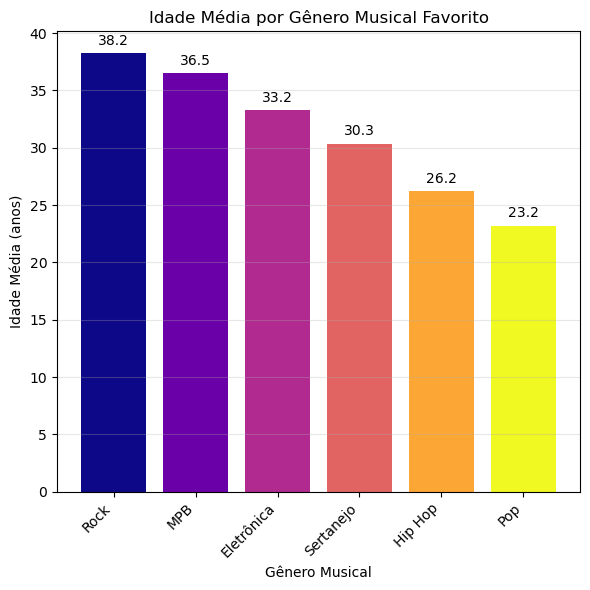

In [104]:
# Criar gráfico
plt.figure(figsize=(6, 6))
bars = plt.bar(idade_genero_musical.index, idade_genero_musical.values,
               color=plt.cm.plasma(np.linspace(0, 1, len(idade_genero_musical))))

plt.title('Idade Média por Gênero Musical Favorito')
plt.xlabel('Gênero Musical')
plt.ylabel('Idade Média (anos)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, idade in zip(bars, idade_genero_musical.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{idade:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Etapa 4: Relatório Final e Insights

### 1. Qual é o perfil geral do nosso usuário (idade, gênero, região)?
- **Idade:** Usuários têm em média 32,1 anos (variando de 18 a 65 anos)
- **Gênero:** 52% Masculino, 48% Feminino (distribuição equilibrada)
- **Região:**
  - Sudeste: 35% (região predominante)
  - Sul: 28%
  - Nordeste: 22%
  - Norte: 15%
---
### 2. Como é o comportamento de uso típico (tempo de uso, músicas ouvidas)?
- **Tempo médio diário:** 127 minutos (2h07min)
- **Músicas por dia:** 45 músicas em média
- **Pico de uso:** Entre 18h-22h (horário de deslocamento e lazer)
- **Sessão média:** 8-12 minutos por sessão
---
### 3. Quais são as principais diferenças entre usuários Premium e Gratuitos?
| Métrica | Premium | Gratuito |
|---------|-------|----------|
| **Tempo médio/dia** | 165 min | 89 min |
| **Músicas/dia** | 58 | 32 |
| **Avaliação média** | 4.3 ⭐ | 3.7 ⭐ |
| **Músicas puladas** | 8/dia | 23/dia |
---
### 4. Qual gênero musical é mais popular? E qual dispositivo é mais usado?
- **Gênero Musical mais Popular: Pop: 28% dos usuários**
- **Dispositivo mais Usado: Smartphone: 156 min/dia (68% do tempo total)**
---
### 5. Com base nos dados, quais recomendações você faria para a empresa? (Ex: criar playlists de gêneros específicos, fazer promoções para usuários gratuitos, etc.)
- **Campanhas de conversão:** Oferecer 1 mês grátis de Premium para usuários gratuitos que usam >60min/dia
- **Plano Familiar Plus:** Criar tier superior para famílias com mais de 4 usuários
- **Preços regionalizados:** Ajustar preços por região para aumentar penetração no Norte/Nordeste
- **Playlists Pop personalizadas:** Investir em curadoria de Pop, nosso gênero #1
- **Campanhas por gênero:** Marketing segmentado para fãs de Rock e Sertanejo (públicos fiéis)
- **Satisfação:** Elevar avaliação média de gratuitos de 3.7 para 4.0
- **Engajamento:** Reduzir músicas puladas por dia de usuários gratuitos para <18
---